# COVID19 PREDICTION

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement
- This study aims to investigate how various factors, including individual demographics (ID, sex, age), symptoms (cough, fever, sore throat, shortness of breath, headache), and contact history with confirmed COVID-19 cases, affect COVID-19 test results. Simultaneously, the objective is to develop a classification model that accurately predicts COVID-19 test outcomes (positive or negative). This model will assist healthcare professionals in making informed decisions for patient care and resource allocation during the pandemic.

## 2) Data Collection
- The current dataset has been downloaded from government website and contains around 2,78,848 individuals who have gone through the RT-PCR test.
- The data consists of 11 column and 278848 rows.

## 2.1 Import Data and Required Packages
###  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('corona_tested_006.csv')

### Show Top 5 Records

In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


### Shape of the dataset

In [4]:
df.shape

(278848, 11)

## 2.2 Dataset information

A. Basic information:

- ID (Individual ID)
- Sex (male/female).
- Age ≥60 above years (true/false)
- Test date (date when tested for COVID)


B. Symptoms:
- Cough (true/false).
- Fever (true/false)
- Sore throat (true/false).
- Shortness of breath (true/false).
- Headache (true/false).


C. Other information:

- Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

- Corona positive or negative



## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**There are no missing values in the data set.**

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

**There are no duplicates values in the data set.**

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe(include='object')

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741


**Insight**

- The most frequent date is 20-04-2020, which suggests a significant number of tests conducted on that particular day.
- The majority of individuals did not report symptoms such as cough, fever, sore throat, shortness of breath, or headache. These symptoms were often marked as "False".
- The majority of individuals tested negative for COVID-19 (260,227 times).
- "None" is a common entry for the "Age_60_above" column, indicating that the age information is not available for a significant number of individuals.

### 3.7 Exploring Data

In [10]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [11]:
def print_unique_categories(dataframe, columns):
    for column in columns:
        if column in dataframe.columns:
            print(f"Categories in '{column}' variable: {dataframe[column].unique()}\n")
        else:
            print(f"Column '{column}' not found in the DataFrame.")

print_unique_categories(df, df.drop(columns=['Ind_ID', 'Test_date'], axis=1).columns)

Categories in 'Cough_symptoms' variable: ['TRUE' 'FALSE' 'None' False True]

Categories in 'Fever' variable: ['FALSE' 'TRUE' 'None' False True]

Categories in 'Sore_throat' variable: ['TRUE' 'FALSE' 'None' False True]

Categories in 'Shortness_of_breath' variable: ['FALSE' 'TRUE' 'None' False True]

Categories in 'Headache' variable: ['FALSE' 'TRUE' 'None' False True]

Categories in 'Corona' variable: ['negative' 'positive' 'other']

Categories in 'Age_60_above' variable: ['None' 'No' 'Yes']

Categories in 'Sex' variable: ['None' 'male' 'female']

Categories in 'Known_contact' variable: ['Abroad' 'Contact with confirmed' 'Other']



In [12]:
def value_counts(df, column):
  for col in column:
    print(f"Value counts of {col} :\n{df[col].value_counts()}\n")

value_counts(df,df.drop(columns=['Ind_ID', 'Test_date'], axis=1).columns)

Value counts of Cough_symptoms :
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

Value counts of Fever :
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

Value counts of Sore_throat :
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

Value counts of Shortness_of_breath :
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

Value counts of Headache :
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

Value counts of Corona :
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

Value counts of Age_60_above :
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

Value counts of Sex :
female    130158
male      129127
None 

**Insight:**

1. Cough Symptoms:

- "False" and "FALSE" seem to represent the absence of cough symptoms and are the most common, with a total of 237,368 cases.
- "TRUE" and "True" represent the presence of cough symptoms, with a total of 42,228 cases.
- There are 252 cases where the cough symptom is not specified.

2. Fever:

- Similar to cough symptoms, "False" and "FALSE" are the most common, with a total of 256,844 cases indicating the absence of fever.
- "TRUE" and "True" represent the presence of fever, with a total of 21,752 cases.
- There are 252 cases where the presence of fever is not specified.

3. Sore Throat:

- "False" and "FALSE" are the most common, indicating the absence of a sore throat, with a total of 276,921 cases.
- "TRUE" and "True" represent the presence of a sore throat, with a total of 1,926 cases.
- There is only one case where the sore throat is not specified.

4. Shortness of Breath:

- "False" and "FALSE" are most common, representing the absence of shortness of breath, with a total of 277,270 cases.
- "TRUE" and "True" represent the presence of shortness of breath, with a total of 1,577 cases.
- There is only one case where shortness of breath is not specified.

5. Headache:

- "False" and "FALSE" are the most common, indicating the absence of a headache, with a total of 276,433 cases.
- "TRUE" and "True" represent the presence of a headache, with a total of 2,414 cases.
- There is only one case where the presence of a headache is not specified.

4. Corona:

- "negative" is the most common outcome, with 260,227 cases.
- "positive" indicates a positive coronavirus result, with 14,729 cases.
- "other" is a category with 3,892 cases that likely represents cases other than positive or negative results.

5. Age 60 Above:

- "None" is the most common value, suggesting that age information is missing or not specified in 127,320 cases.
- "No" indicates that the individual is not 60 or above, with 125,703 cases.
- "Yes" indicates that the individual is 60 or above, with 25,825 cases.

6. Sex:

- "female" and "male" are almost evenly distributed, with 130,158 and 129,127 cases, respectively.
- There are 19,563 cases where sex information is not provided.

7. Known Contact:

- "Other" is the most common category, indicating cases where the known contact type is not specified, with 242,741 cases.
- "Abroad" suggests contact with individuals from abroad, with 25,468 cases.
- "Contact with confirmed" suggests contact with confirmed COVID-19 cases, with 10,639 cases.

### 3.8 Handling Data Inconsistencies and Missingness

In [13]:
df = df.replace('None', np.nan)

In [14]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

**Insight:**

- We have seen that there are a number of fields named 'None'.
- All of these records appear to be null values. Therefore, we have converted all instances of 'None' to null.

In [15]:
for i in df.columns:
    print(f"{i} has",round(df[i].isnull().sum()*100/df.shape[0],5),"%")

Ind_ID has 0.0 %
Test_date has 0.0 %
Cough_symptoms has 0.09037 %
Fever has 0.09037 %
Sore_throat has 0.00036 %
Shortness_of_breath has 0.00036 %
Headache has 0.00036 %
Corona has 0.0 %
Age_60_above has 45.65928 %
Sex has 7.01565 %
Known_contact has 0.0 %


**Insight:**

- We have null values in most of the columns.
- We will remove that rows where percentage of null values is less than 1%.
- For missingness > 1%, we will consider them as extra category and name them accordingly.

#### Dropping rows for columns with missing values less than 1%

In [16]:
df = df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0)

In [17]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127315
Sex                     19552
Known_contact               0
dtype: int64

#### Handling Missing Data in 'Age_60_above' and 'Sex' Columns

In [18]:
df['Age_60_above'] = df['Age_60_above'].fillna('Unspecified')
df['Sex'] = df['Sex'].fillna('Unspecified')

#### Handling Inconsistency in Target column

In [19]:
df['Corona'] = df['Corona'].replace({'other': np.nan})
df = df.dropna(axis=0)

#### Handling Inconsistencies in different columns

In [20]:
df['Cough_symptoms']      = df['Cough_symptoms'].replace({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})
df['Fever']               = df['Fever'].replace({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})
df['Sore_throat']         = df['Sore_throat'].replace({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})
df['Headache']            = df['Headache'].replace({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})

In [21]:
value_counts(df,df.drop(columns=['Ind_ID', 'Test_date'], axis=1).columns)

Value counts of Cough_symptoms :
False    233133
True      41569
Name: Cough_symptoms, dtype: int64

Value counts of Fever :
False    253328
True      21374
Name: Fever, dtype: int64

Value counts of Sore_throat :
False    272814
True       1888
Name: Sore_throat, dtype: int64

Value counts of Shortness_of_breath :
False    273156
True       1546
Name: Shortness_of_breath, dtype: int64

Value counts of Headache :
False    272325
True       2377
Name: Headache, dtype: int64

Value counts of Corona :
negative    260008
positive     14694
Name: Corona, dtype: int64

Value counts of Age_60_above :
Unspecified    125659
No             123668
Yes             25375
Name: Age_60_above, dtype: int64

Value counts of Sex :
female         128413
male           127255
Unspecified     19034
Name: Sex, dtype: int64

Value counts of Known_contact :
Other                     239167
Abroad                     25068
Contact with confirmed     10467
Name: Known_contact, dtype: int64



#### Is there an association between the presence of cough symptoms and the occurrence of Corona (COVID-19)

In [22]:
pd.crosstab(df['Cough_symptoms'], df['Corona'])

Corona,negative,positive
Cough_symptoms,,
False,225021,8112
True,34987,6582


For individuals who do not have cough symptoms (Cough_symptoms = False):

- The number of individuals who tested negative for Corona is 225,021.
- The number of individuals who tested positive for Corona is 8,112.

For individuals who have cough symptoms (Cough_symptoms = True):

- The number of individuals who tested negative for Corona is 34,987.
- The number of individuals who tested positive for Corona is 6,582.

#### What is the distribution of the 'Age_60_above' variable among individuals who tested 'positive' for 'Corona'?

In [23]:
df[df['Corona'] == 'positive']['Age_60_above'].value_counts()

No             9241
Unspecified    3257
Yes            2196
Name: Age_60_above, dtype: int64

In [24]:
# converting the datatype as categorical
df_new= df.copy()
for i in df.columns:
    if i=='Ind_ID' or i == 'Test_date' or i == 'Test_date':
        pass
    else:
        df_new[i] = df[i].astype('category')

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Age_60_above         274702 non-null  category
 9   Sex                  274702 non-null  category
 10  Known_contact        274702 non-null  category
dtypes: category(9), int64(1), object(1)
memory usage: 8.6+ MB


#### Chi- Square Test for finding the relationship between dependent and independent features.

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

dependent_variable = 'Corona'

independent_variables = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# empty dictionary to store chi-squared statistics and p-values
chi_squared_results = {}

# Loop through each independent variable and perform chi-squared test
for variable in independent_variables:
    contingency_table = pd.crosstab(df_new[dependent_variable], df_new[variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_squared_results[variable] = {'Chi-Squared Statistic': chi2, 'P-Value': p}

#=results
for variable, result in chi_squared_results.items():
    print(f"Chi-Squared Test for {variable}:")
    print(f"Chi-Squared Statistic: {result['Chi-Squared Statistic']:.2f}")
    print(f"P-Value: {result['P-Value']:.4f}")
    print()


Chi-Squared Test for Cough_symptoms:
Chi-Squared Statistic: 10632.83
P-Value: 0.0000

Chi-Squared Test for Fever:
Chi-Squared Statistic: 19525.03
P-Value: 0.0000

Chi-Squared Test for Sore_throat:
Chi-Squared Statistic: 21285.78
P-Value: 0.0000

Chi-Squared Test for Shortness_of_breath:
Chi-Squared Statistic: 14952.82
P-Value: 0.0000

Chi-Squared Test for Headache:
Chi-Squared Statistic: 37047.01
P-Value: 0.0000

Chi-Squared Test for Age_60_above:
Chi-Squared Statistic: 3535.49
P-Value: 0.0000

Chi-Squared Test for Sex:
Chi-Squared Statistic: 207.08
P-Value: 0.0000

Chi-Squared Test for Known_contact:
Chi-Squared Statistic: 90514.82
P-Value: 0.0000



**Insights:**

- The results of the chi-squared tests for each of  the categorical variables indicate highly significant associations between each of these variables and the "Corona" variable.
- P-value close to 0 indicates observed associations are not likely due to random chance.
- The chi-squared statistic is significantly large, suggests each of these variables (e.g., Cough_symptoms, Fever, Sore_throat, etc.) are significantly related to the occurrence of "Corona."

## 4. Exploring Data ( Visualization )

### 4.1 Countplots

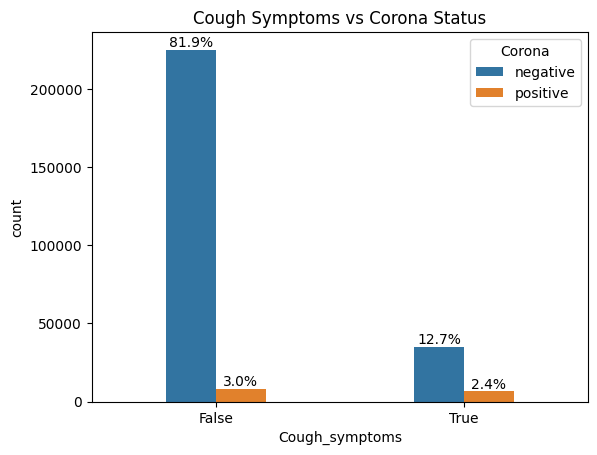

In [27]:
ax = sns.countplot(x='Cough_symptoms', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Cough Symptoms vs Corona Status")
plt.show()

**Insight:**

- It appears that the majority of people who tested negative for Corona did not have cough symptoms.
- The majority of people who tested positive for Corona did have cough symptoms.

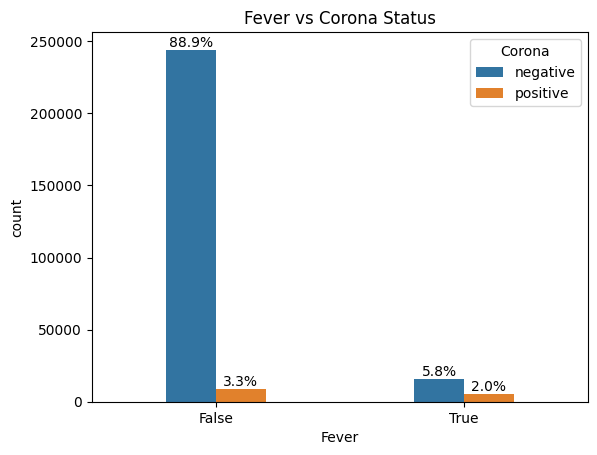

In [28]:
ax = sns.countplot(x='Fever', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Fever vs Corona Status")
plt.show()

**Insight:**

- It appears that the majority of people who tested negative for Corona did not have a fever.
- A smaller percentage of people who tested positive for Corona did have a fever (2%).


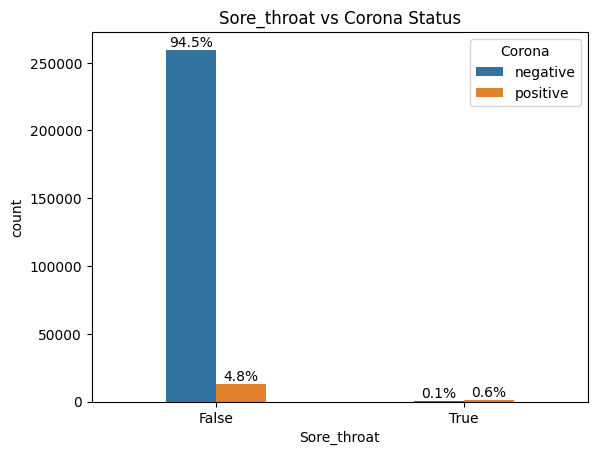

In [29]:
ax = sns.countplot(x='Sore_throat', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Sore_throat vs Corona Status")
plt.show()

**Insight:**

- It appears that the majority of people who tested negative for COVID-19 did not have a sore throat.
- A smaller percentage (0.6%) of people who tested positive for COVID-19 did have a sore throat

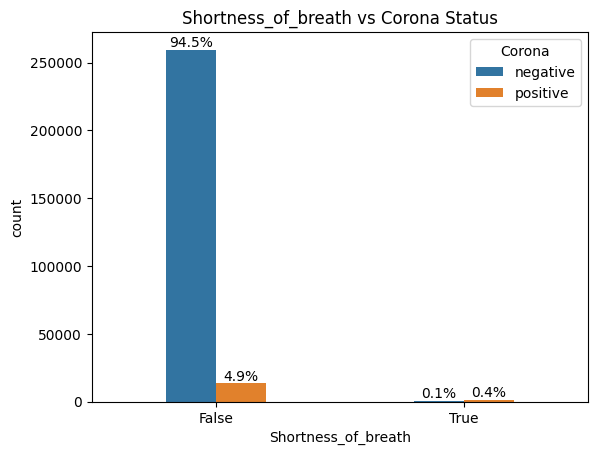

In [30]:
ax = sns.countplot(x='Shortness_of_breath', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Shortness_of_breath vs Corona Status")
plt.show()

**Insight:**

- The majority of people who tested negative for Corona did not experience shortness of breath.
- Small percentage of people (0.4%) who tested positive for Corona did experience shortness of breath.

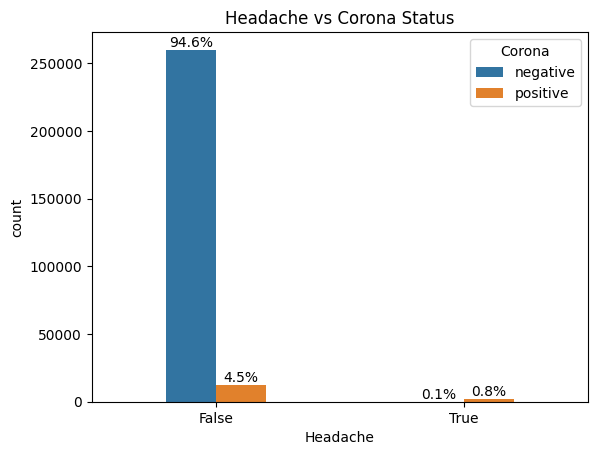

In [31]:
ax = sns.countplot(x='Headache', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Headache vs Corona Status")
plt.show()

**Insight:**

- The majority of people who tested negative for Corona did not experience Headache.
- Small percentage of people (0.8%) who tested positive for Corona did experience Headache.

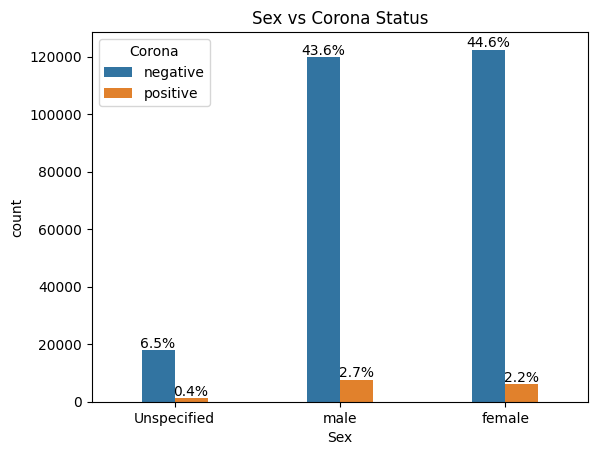

In [32]:
ax = sns.countplot(x='Sex', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Sex vs Corona Status")
plt.show()

**Insight:**

- Percentage of positive cases is higher in males (2.7%) compared to females (2.2%).
- Percentage of positive cases and negative cases is quite low for Unspecified Sex.

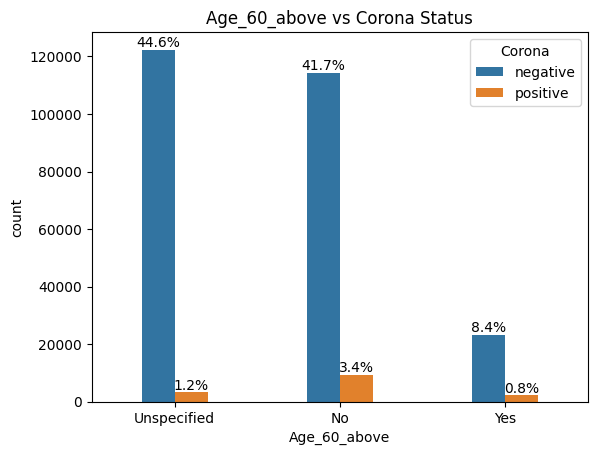

In [33]:
ax = sns.countplot(x='Age_60_above', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Age_60_above vs Corona Status")
plt.show()

**Insight:**

- More number of people below 60 years tested positive.
- only (0.8%) few peoples above 60 years tested positive.

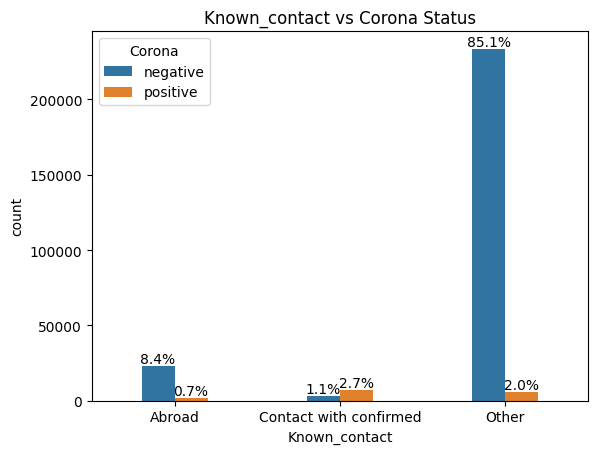

In [34]:
ax = sns.countplot(x='Known_contact', hue='Corona', data=df, width=0.4)

total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Known_contact vs Corona Status")
plt.show()

**Insight:**

- Out of 3.8% people who had contact with confirmed known_contact, 2.7% tested positive.
- Abroad Return positive percentage is 0.7%.

### 4.2 Pieplot for Covid Positive Patients

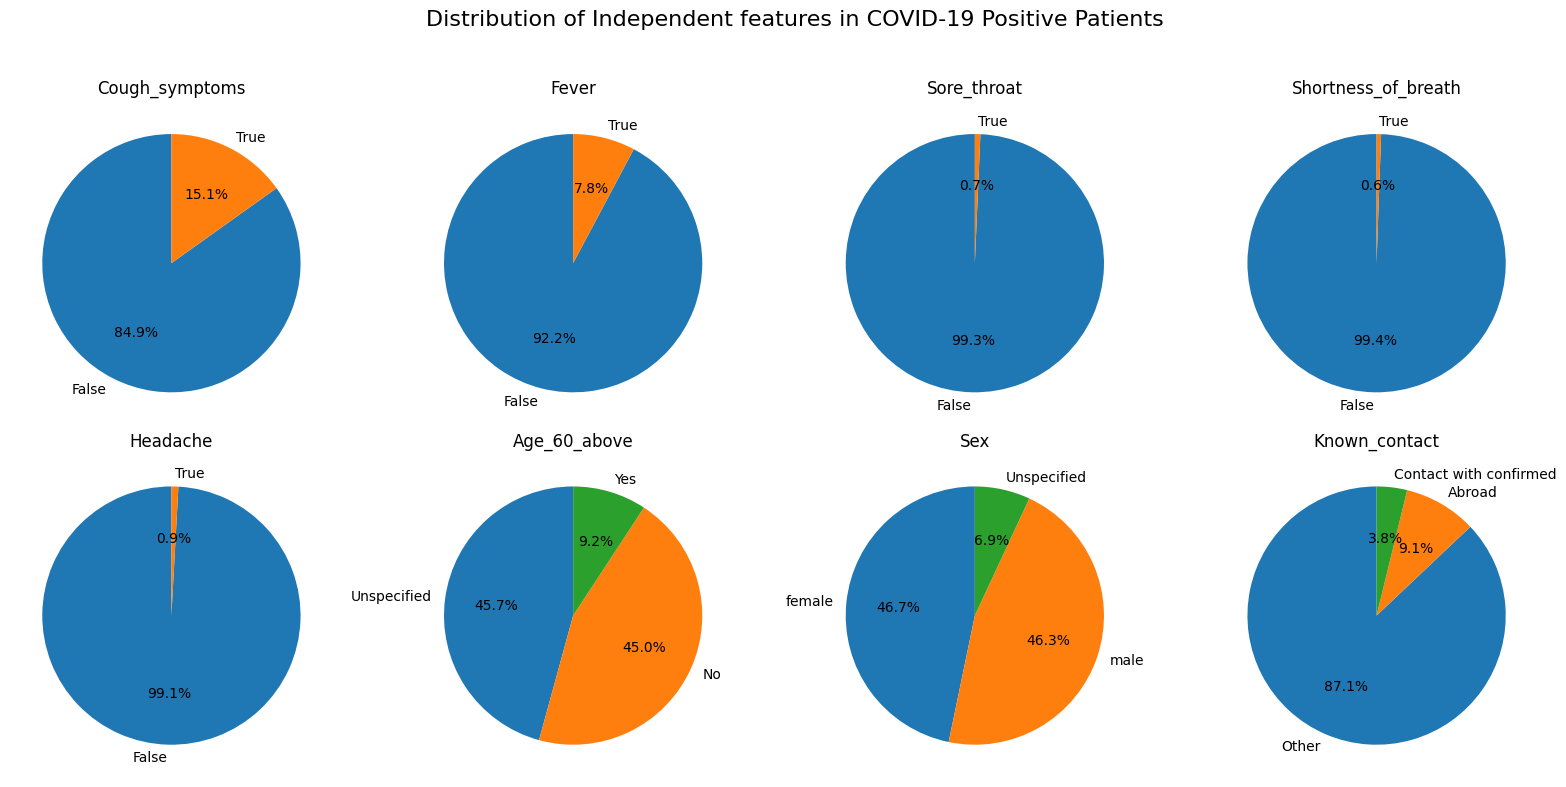

In [35]:
covid_positive_df = df[df['Corona'] == 'positive']

independent_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Set up subplots for each feature
num_features = len(independent_features)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Distribution of Independent features in COVID-19 Positive Patients', fontsize=16)

for i, feature in enumerate(independent_features):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    counts = df_new[feature].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(feature)

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Insight:**

- Mostly Patients with corona positive have cough_symptoms and fever.
- Headache, sore throat and shortness of breath are not present in Corona negative patients.
- Almost 50% of Corona Positive Patients have been in contact with other positive patients.

### 4.3 Encoding Data for furthur analysis

In [36]:
from sklearn.preprocessing import LabelEncoder

# Perfoming LabelEncoding
df_new[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']] =\
df_new[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']].apply(LabelEncoder().fit_transform)

In [37]:
df_new.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,Unspecified,Unspecified,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,Unspecified,Unspecified,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,Unspecified,Unspecified,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,Unspecified,Unspecified,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,Unspecified,Unspecified,Contact with confirmed


In [38]:
# Defining one_hot_encoder : mostly used for nominal variable encoding.
def one_hot_encode_column(data, column_name):
    encoded_column = pd.get_dummies(data[column_name], prefix=column_name, drop_first=True)
    return encoded_column

In [39]:
# Applying One-hot-encoder to all the nominal varible.
encoded_Age_60_above = one_hot_encode_column(df_new, 'Age_60_above')
encoded_Sex = one_hot_encode_column(df_new, 'Sex')
encoded_Known_contact = one_hot_encode_column(df_new, 'Known_contact')

In [40]:
# Concatenating all the encoded variables with the original dataframe.
df_new = pd.concat([df_new, encoded_Age_60_above, encoded_Sex, encoded_Known_contact],axis=1)

In [41]:
df_new.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Age_60_above_Unspecified,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,11-03-2020,1,0,1,0,0,negative,Unspecified,Unspecified,Abroad,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,positive,Unspecified,Unspecified,Abroad,1,0,0,0,0,0
2,3,11-03-2020,0,1,0,0,0,positive,Unspecified,Unspecified,Abroad,1,0,0,0,0,0
3,4,11-03-2020,1,0,0,0,0,negative,Unspecified,Unspecified,Abroad,1,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,negative,Unspecified,Unspecified,Contact with confirmed,1,0,0,0,1,0


In [42]:
# Dropping the previous columns which were encoded.
df_new.drop(["Ind_ID","Test_date","Corona", 'Age_60_above', 'Sex', 'Known_contact'],axis=1,inplace=True)
df_new.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above_Unspecified,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,1,0


### 4.4 Calculating VIF for analyzing the multicollinearity

In [43]:
# First Import variance_inflation_factor (VIF) from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]

print(vif_data)

                                 feature       VIF
0                         Cough_symptoms  1.685557
1                                  Fever  1.409252
2                            Sore_throat  1.164793
3                    Shortness_of_breath  1.087650
4                               Headache  1.202075
5               Age_60_above_Unspecified  2.028026
6                       Age_60_above_Yes  1.204370
7                             Sex_female  4.905002
8                               Sex_male  4.810271
9   Known_contact_Contact with confirmed  1.309847
10                   Known_contact_Other  7.575167


**Insight:**

- Age 60 Above (Unspecified): VIF = 2.0280. Age_60_above with an 'Unspecified' value has a moderate VIF, indicating some level of multicollinearity.

- Sex (Female): VIF = 4.9050. The 'Sex' feature with a 'female' value has a relatively high VIF, suggesting a moderate level of multicollinearity.

- Sex (Male): VIF = 4.8103. The 'Sex' feature with a 'male' value also has a relatively high VIF, indicating a moderate level of multicollinearity.

- Known Contact (Other): VIF = 7.5752. The 'Known Contact' feature with an 'Other' value has a high VIF, indicating a high level of multicollinearity.

## 5. Conclusion

- Symptoms like Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache etc. significantly affect the covid prediction.
- Individuals aged above 60 may have a greater chance of testing positive for COVID-19.
- Having contact with confirmed COVID-19 cases may increase the likelihood of testing positive for the virus.

In [44]:
# Map the target column
target_mapping = {"positive": 1, "negative": 0}
df['Corona'] = df['Corona'].map(target_mapping)

In [45]:
# training_data = df.drop(['Ind_ID', 'Test_date'], axis= 1)
# training_data.to_csv('Training_data.csv')